In [2]:
!pip install mlxtend

In [3]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

# ARM 수행하기

## 1. 데이터 작성

In [4]:
tran = [['bread', 'milk'],
       ['bread', 'diaper', 'beer', 'eggs'],
       ['milk', 'diaper', 'beer', 'coke'],
        ['bread', 'milk', 'diaper', 'beer'],
        ['bread', 'milk', 'diaper', 'coke']]

In [5]:
te = TransactionEncoder()
tran_ar = te.fit(tran).transform(tran)
print(tran_ar)

[[False  True False False False  True]
 [ True  True False  True  True False]
 [ True False  True  True False  True]
 [ True  True False  True False  True]
 [False  True  True  True False  True]]


In [6]:
print(te.columns_)

['beer', 'bread', 'coke', 'diaper', 'eggs', 'milk']


In [7]:
df = pd.DataFrame(tran_ar, columns = te.columns_)
print(df)

    beer  bread   coke  diaper   eggs   milk
0  False   True  False   False  False   True
1   True   True  False    True   True  False
2   True  False   True    True  False   True
3   True   True  False    True  False   True
4  False   True   True    True  False   True


## 2. 탐색적 데이터 분석

In [8]:
freq = df.sum().to_frame('Frequency')
freq

,Frequency
beer,3
bread,4
coke,2
diaper,4
eggs,1
milk,4


In [9]:
freq_sort = freq.sort_values('Frequency', ascending = False)
print(freq_sort)

        Frequency
bread           4
diaper          4
milk            4
beer            3
coke            2
eggs            1


In [10]:
freq_sort['Support'] = freq_sort['Frequency'] / len(df)
print(freq_sort)

        Frequency  Support
bread           4      0.8
diaper          4      0.8
milk            4      0.8
beer            3      0.6
coke            2      0.4
eggs            1      0.2


<AxesSubplot:title={'center':'FrequentItems'}>

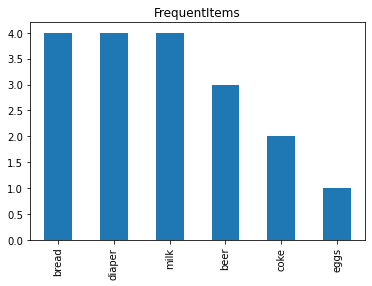

In [11]:
freq_sort['Frequency'].plot(kind='bar', title='FrequentItems')

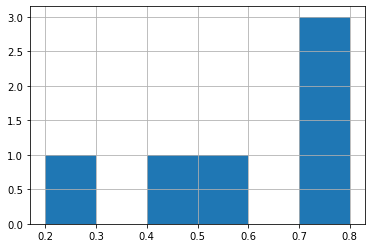

In [12]:
freq_sort['Support'].hist(bins=6);

## 3. 연관규칙 생성

In [13]:
freq_items = apriori(df, min_support=0.4, use_colnames=True)
print(freq_items)

    support               itemsets
0       0.6                 (beer)
1       0.8                (bread)
2       0.4                 (coke)
3       0.8               (diaper)
4       0.8                 (milk)
5       0.4          (bread, beer)
6       0.6         (diaper, beer)
7       0.4           (beer, milk)
8       0.6        (bread, diaper)
9       0.6          (bread, milk)
10      0.4         (diaper, coke)
11      0.4           (milk, coke)
12      0.6         (diaper, milk)
13      0.4  (bread, diaper, beer)
14      0.4   (diaper, beer, milk)
15      0.4  (bread, diaper, milk)
16      0.4   (diaper, milk, coke)


In [14]:
rules = association_rules(freq_items, metric='confidence', min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(diaper),(beer),0.8,0.6,0.6,0.75,1.250000,0.12,1.6
1,(beer),(diaper),0.6,0.8,0.6,1.00,1.250000,0.12,inf
2,(bread),(diaper),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
3,(diaper),(bread),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
4,(bread),(milk),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
5,(milk),(bread),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
6,(coke),(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
7,(coke),(milk),0.4,0.8,0.4,1.00,1.250000,0.08,inf
8,(diaper),(milk),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8
9,(milk),(diaper),0.8,0.8,0.6,0.75,0.937500,-0.04,0.8


In [15]:
rules = rules[(rules['lift'] > 1)]
rules.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(beer),(diaper),0.6,0.8,0.6,1.00,1.250000,0.12,inf
6,(coke),(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
7,(coke),(milk),0.4,0.8,0.4,1.00,1.250000,0.08,inf
10,"(bread, beer)",(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
11,"(beer, milk)",(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
12,"(diaper, coke)",(milk),0.4,0.8,0.4,1.00,1.250000,0.08,inf
13,"(coke, milk)",(diaper),0.4,0.8,0.4,1.00,1.250000,0.08,inf
14,(coke),"(diaper, milk)",0.4,0.6,0.4,1.00,1.666667,0.16,inf
0,(diaper),(beer),0.8,0.6,0.6,0.75,1.250000,0.12,1.6


## 4. 결과 분석

In [16]:
rules[rules.antecedents.apply(lambda x:'diaper' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(diaper),(beer),0.8,0.6,0.6,0.75,1.25,0.12,1.6
12,"(diaper, coke)",(milk),0.4,0.8,0.4,1.00,1.25,0.08,inf


In [17]:
rules[rules.consequents.apply(lambda x:'milk' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(coke),(milk),0.4,0.8,0.4,1.0,1.250000,0.08,inf
12,"(diaper, coke)",(milk),0.4,0.8,0.4,1.0,1.250000,0.08,inf
14,(coke),"(diaper, milk)",0.4,0.6,0.4,1.0,1.666667,0.16,inf


# 실전 예제: 온라인 유통 상품의 연관성 분석

## 1. 데이터파일 준비

In [ ]:
df = pd.read_excel('./Online Retail.xlsx')
df

In [19]:
df = df[['InvoiceNo', 'Description', 'Quantity', 'UnitPrice']]

## 2. 탐색적 데이터 분석

In [20]:
df[df['Quantity'] <= 0]

,InvoiceNo,Description,Quantity,UnitPrice
141,C536379,Discount,-1,27.50
154,C536383,SET OF 3 COLOURED FLYING DUCKS,-1,4.65
235,C536391,PLASTERS IN TIN CIRCUS PARADE,-12,1.65
236,C536391,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29
237,C536391,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29
...,...,...,...,...
540449,C581490,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83
541541,C581499,Manual,-1,224.69
541715,C581568,VICTORIAN SEWING BOX LARGE,-5,10.95
541716,C581569,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25


In [21]:
df = df[df['Quantity'] > 0]

,InvoiceNo,Description,Quantity,UnitPrice
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,536365,WHITE METAL LANTERN,6,3.39
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39
...,...,...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS,12,0.85
541905,581587,CHILDREN'S APRON DOLLY GIRL,6,2.10
541906,581587,CHILDRENS CUTLERY DOLLY GIRL,4,4.15
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15


In [ ]:
df = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()

In [25]:
df

InvoiceNo  Description                        
536365     CREAM CUPID HEARTS COAT HANGER          8
           GLASS STAR FROSTED T-LIGHT HOLDER       6
           KNITTED UNION FLAG HOT WATER BOTTLE     6
           RED WOOLLY HOTTIE WHITE HEART.          6
           SET 7 BABUSHKA NESTING BOXES            2
                                                  ..
C581490    ZINC T-LIGHT HOLDER STARS SMALL       -11
C581499    Manual                                 -1
C581568    VICTORIAN SEWING BOX LARGE             -5
C581569    36 PENCILS TUBE RED RETROSPOT          -5
           HANGING HEART JAR T-LIGHT HOLDER       -1
Name: Quantity, Length: 529586, dtype: int64

In [26]:
df = df.unstack()

In [27]:
df

Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C581490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C581499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
def encode_units(x):
    if x >= 1: return 1
    else: return 0

df = df.applymap(encode_units)
df


KeyboardInterrupt

